In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
import tweets_utils
import importlib
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Verified create df](#verified)
- [Merge CCDH df](#merge_df)
- [Disinform Dozen vs Verified users behaviour](#ccdh_behaviour)
- [Polot timeline](#timeline)   
  ### General
    - [Stats](#stats)

  ### Interactions
    - [CCDH Top Users](#top_c)
    - [Verified Top Users](#top_v)
    
  ### Hashtags
    - [CCDH Hashtag used](#hastag_ccdh)
    - [Verified Hashtag used](#hastag_verified)
    
  ### Urls
    - [Urls CCDH](#ccdh_urls)
    - [Urls Verified](#ccdh_verified)
    
  ### Bot score
   - [CCDH bot score distribution](#ccdh_bot)
   - [Verified bot score distribution](#verified_bot)
   - [Comparison between distributions](#comp)

### Verified df
<a id="verified"/>

In [2]:
files_users = glob.glob("F:/COVID-19-Tweets/*/users.csv")
files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [3]:
names = []
users = []
verified = []
cols_users = [u'id', u'screen_name', u'verified'] 

cols_tweets = [
    u'user_id',u'user_screen_name', u'hashtags', u'urls',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 
    u'rt_created_at', u'in_reply_to_status_id'
              ]

In [56]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.info()

In [55]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_users:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_users, False))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        verified.extend(lista[i]["verified"])
        
for i in range(len(users)):
    if(verified[i] == True):
        names.append(users[i])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [54]:
names = list(pd.Series(names).unique())
names

In [53]:
result = []
data = pd.DataFrame()
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, names))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        data = data.append(lista[i]["df"])
    print(len(data))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [52]:
data = data.reset_index(drop=True)
data

### Merge CCDH
<a id="merge_df"/>

In [14]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/']

In [15]:
# data.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/verified_tweets.csv", index=False)

In [16]:
cols = [
    u'id',u'user_id',u'user_screen_name',u'urls', u'hashtags',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 'created_at']

In [19]:
ccdh_original_complete = pd.read_csv(path[0] + "ccdh_tweets.csv", usecols = cols)
# ccdh_original_complete

In [20]:
ccdh_rt_complete = pd.read_csv(path[0] + "ccdh_retweets.csv", usecols = cols)
# ccdh_rt_complete

In [21]:
ccdh_rt_searched = pd.read_csv(path[0] + "ccdh_user_rt.csv")
# ccdh_rt_searched

In [22]:
ccdh_rp_searched = pd.read_csv(path[0] + "ccdh_user_rp.csv")
# ccdh_rp_searched

In [23]:
ccdh_original_searched = pd.read_csv(path[0] + "ccdh_original.csv")
# ccdh_original_searched

In [25]:
df = ccdh_original_complete.append(ccdh_rt_searched)
df = df.append(ccdh_rt_complete)
df = df.append(ccdh_rp_searched)
df = df.append(ccdh_original_searched)

In [26]:
df = df.reset_index(drop=True)

In [27]:
df.drop_duplicates(subset ="id", keep = False, inplace = True)

In [62]:
df

In [29]:
new_l = len(df)
old_sum = len(ccdh_original_complete) + len(ccdh_rt_complete) + len(ccdh_rt_searched) + len(ccdh_rp_searched) + len(ccdh_original_searched)
print(f"New df length: {new_l}")
print(f"Sum of all length: {(old_sum)}")
print(f"Diff: {old_sum - new_l}")

New df length: 129358
Sum of all length: 129736
Diff: 378


In [30]:
df.to_csv(path[0] + "ccdh_merged_tweets_w_dates.csv", index=False)

# Disinform Dozen vs Verified users behaviour
<a id="ccdh_behaviour"/>

In [31]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
df = pd.read_csv(path[0] + "ccdh_merged_tweets_w_dates.csv")
v_path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/")
df_v = pd.read_csv(v_path[0] + "verified_tweets.csv")
# df_v

In [58]:
df

id                 created_at     user_id  \
0       1422926560412127235  2021-08-04 14:25:03+00:00  12524522.0   
1       1422649949616017409  2021-08-03 20:05:54+00:00  12524522.0   
2       1422639392460521477  2021-08-03 19:23:57+00:00  12524522.0   
3       1422635443812720642  2021-08-03 19:08:15+00:00  12524522.0   
4       1422635145262247941  2021-08-03 19:07:04+00:00  12524522.0   
...                     ...                        ...         ...   
129353  1263609166809137152                        NaN  35013035.0   
129354  1262074881858035712                        NaN  35013035.0   
129355  1264290703871561728                        NaN  35013035.0   
129356  1258471715035807745                        NaN  35013035.0   
129357  1260706851940978688                        NaN  35013035.0   

       user_screen_name  in_reply_to_user_id in_reply_to_screen_name  \
0               mercola                  NaN                     NaN   
1               mercola                  NaN                     NaN   
2               mercola                  NaN                     NaN   
3               mercola                  NaN                     NaN   
4               mercola                  NaN                     NaN   
...                 ...                  ...                     ...   
129353          BusyDrT                  NaN                     NaN   
129354          BusyDrT                  NaN                     NaN   
129355          BusyDrT                  NaN                     NaN   
129356          BusyDrT                  NaN                     NaN   
129357          BusyDrT                  NaN                     NaN   

        rt_user_id rt_user_screen_name  \
0              NaN                 NaN   
1              NaN                 NaN   
2              NaN                 NaN   
3              NaN                 NaN   
4              NaN                 NaN   
...            ...                 ...   
129353         NaN                 NaN   
129354         NaN                 NaN   
129355         NaN                 NaN   
129356         NaN                 NaN   
129357         NaN                 NaN   

                                                 hashtags  \
0                                                      []   
1                                                      []   
2                                                      []   
3                                                      []   
4                                                      []   
...                                                   ...   
129353  [{'text': 'sheeple', 'indices': [19, 27]}, {'t...   
129354  [{'text': 'NDAA', 'indices': [13, 18]}, {'text...   
129355  [{'text': 'scamdemic', 'indices': [46, 56]}, {...   
129356  [{'text': 'BillGates', 'indices': [20, 30]}, {...   
129357  [{'text': 'CNN', 'indices': [23, 27]}, {'text'...   

                                                     urls  
0       [{'url': 'https://t.co/RyPNO87E0m', 'expanded_...  
1       [{'url': 'https://t.co/zYFhJSPGxj', 'expanded_...  
2       [{'url': 'https://t.co/SpkCAmlljD', 'expanded_...  
3       [{'url': 'https://t.co/wBdNNdN0Iv', 'expanded_...  
4       [{'url': 'https://t.co/oNfgM4iMXy', 'expanded_...  
...                                                   ...  
129353  [{'url': 'https://t.co/etIOzzxMKo', 'expanded_...  
129354  [{'url': 'https://t.co/vGFIJ9NXLH', 'expanded_...  
129355  [{'url': 'https://t.co/OGImMHFqHD', 'expanded_...  
129356  [{'url': 'https://t.co/kgKHY071kM', 'expanded_...  
129357  [{'url': 'https://t.co/B6cNLlot7T', 'expanded_...  

[129358 rows x 10 columns]

In [59]:
original = df[df['rt_user_id'].isna() & df['in_reply_to_user_id'].isna()]
retweet = df[df['rt_user_id'].notna()]
reply = df[df['in_reply_to_user_id'].notna()]
total_len = len(df)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)

original_v = df_v[df_v['rt_user_id'].isna() & df_v['in_reply_to_user_id'].isna()]
retweet_v = df_v[df_v['rt_user_id'].notna()]
reply_v = df_v[df_v['in_reply_to_user_id'].notna()]
total_len_v = len(df_v)
len_original_v = len(original_v)
len_rt_v = len(retweet_v)
len_rp_v = len(reply_v)

In [60]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv", usecols=[u"screen_name"])
disinform

screen_name
0           mercola
1   RobertKennedyJr
2       TyCharleneB
3           BusyDrT
4        IslamRizza
5          DrButtar
6    unhealthytruth
7        sayerjigmi
8     KellyBroganMD
9   DrChrisNorthrup
10     DrBenTapper1
11     kevdjenkins1

In [61]:
original_ccdh = []
for i in original["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            original_ccdh.append(i)

rt_ccdh = []
for i in retweet["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rt_ccdh.append(i)

rp_ccdh = []
for i in reply["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rp_ccdh.append(i)
total_ccdh = len(original_ccdh) + len(rt_ccdh) + len(rp_ccdh)

total_i = total_len - (len(original_ccdh) + len(rt_ccdh) + len(rp_ccdh))
len_original_i = len_original - len(original_ccdh)
len_rt_i = len_rt - len(rt_ccdh)
len_rp_i = len_rp - len(rp_ccdh)

## Plot timeline
<a id="timeline"/>

In [65]:
dates = df["created_at"].dropna()
dates_formatted = []
for i in dates:
    x = i.split()[0]
    if("2" in x):
        dates_formatted.append(x)
    else:
        y = tweets_utils.process_datetime(i)
        dates_formatted.append(y)

In [66]:
fig = px.histogram(dates_formatted)
fig.update_layout(
    title_text='Daily tweets', # title of plot
    xaxis_title_text='Tweet', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

## Stats
<a id="stats"/>

#### CCDH Actions

In [19]:
tweets_utils.stats(total_ccdh, len(original_ccdh), len(rt_ccdh), len(rp_ccdh))

Number of total tweets: 18964
Number of original tweets: 14602
Number of retweet: 2670
Number of reply: 1692
Number of original_tweets: 77.0% of total tweets
Number of retweets: 14.08% of total tweets
Number of replies: 8.92% of total tweets
Check sum == len(tweets):  True


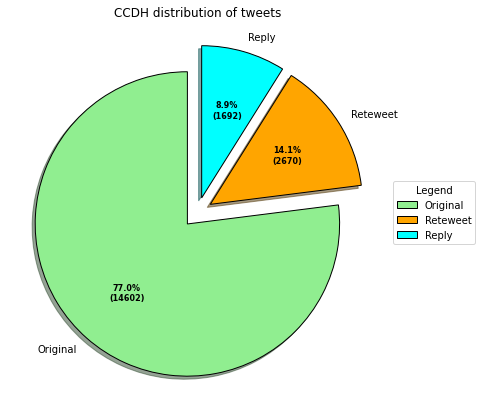

In [21]:
tweets_utils.print_pie_chart3("CCDH distribution of tweets", "Original", "Reteweet", "Reply", 
    len(original_ccdh), len(rt_ccdh), len(rp_ccdh))

#### CCDH interactions

In [11]:
tweets_utils.stats(total_i, len_original_i, len_rt_i, len_rp_i)

Number of total tweets: 110394
Number of original tweets: 2966
Number of retweet: 107194
Number of reply: 234
Number of original_tweets: 2.69% of total tweets
Number of retweets: 97.1% of total tweets
Number of replies: 0.21% of total tweets
Check sum == len(tweets):  True


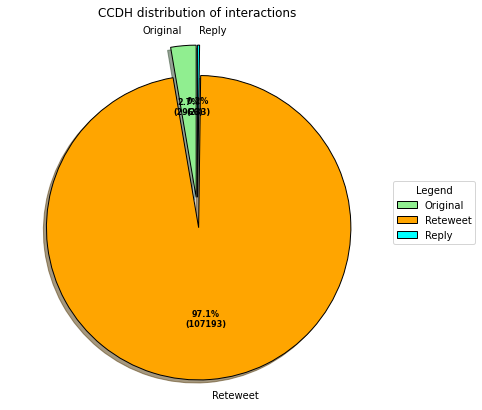

In [12]:
tweets_utils.print_pie_chart3("CCDH distribution of interactions", "Original", "Reteweet", "Reply", 
    len_original_i, len_rt_i, len_rp_i)

#### Verified

In [107]:
tweets_utils.stats(total_len_v, len_original_v, len_rt_v, len_rp_v)

Number of total tweets: 1687343
Number of original tweets: 1003621
Number of retweet: 573672
Number of reply: 110050
Number of original_tweets: 59.48% of total tweets
Number of retweets: 34.0% of total tweets
Number of replies: 6.52% of total tweets
Check sum == len(tweets):  True


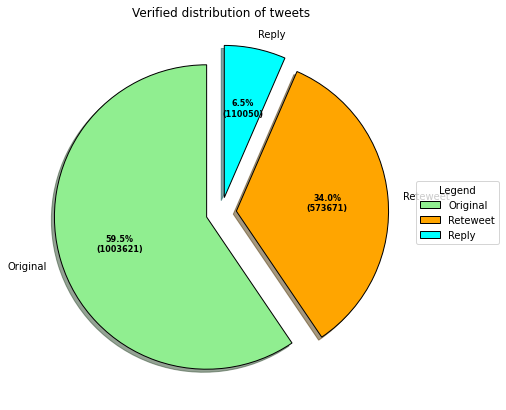

In [108]:
tweets_utils.print_pie_chart3("Verified distribution of tweets", "Original", "Reteweet", "Reply", 
    len_original_v, len_rt_v, len_rp_v)

## CCDH Top Users
<a id="top_c" />

In [13]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
disinform["screen_name"]

0             mercola
1     RobertKennedyJr
2         TyCharleneB
3             BusyDrT
4          IslamRizza
5            DrButtar
6      unhealthytruth
7          sayerjigmi
8       KellyBroganMD
9     DrChrisNorthrup
10       DrBenTapper1
11       kevdjenkins1
Name: screen_name, dtype: object

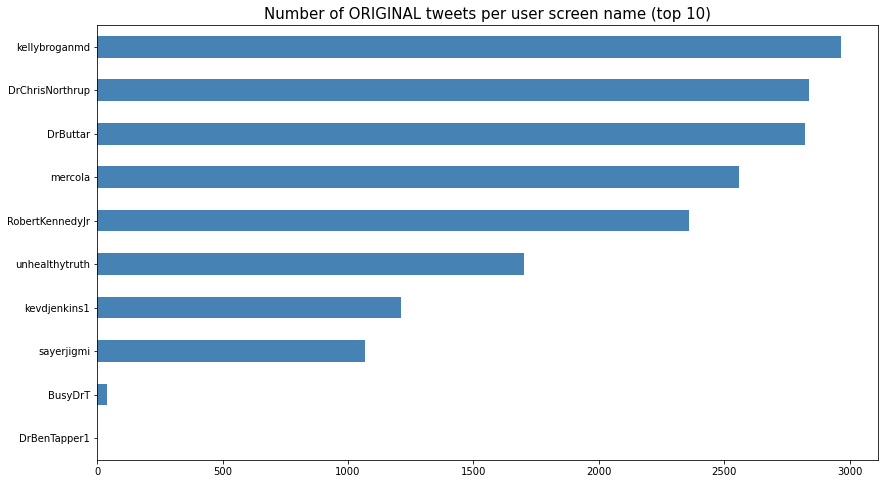

In [7]:
val = pd.Series(original["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

In [68]:
importlib.reload(tweets_utils)
val = pd.Series(retweet["user_screen_name"])
value_d = []
value_u = []
for i in val:
    if(tweets_utils.found(i, disinform["screen_name"])):
        value_d.append(i)
    else:
        value_u.append(i)

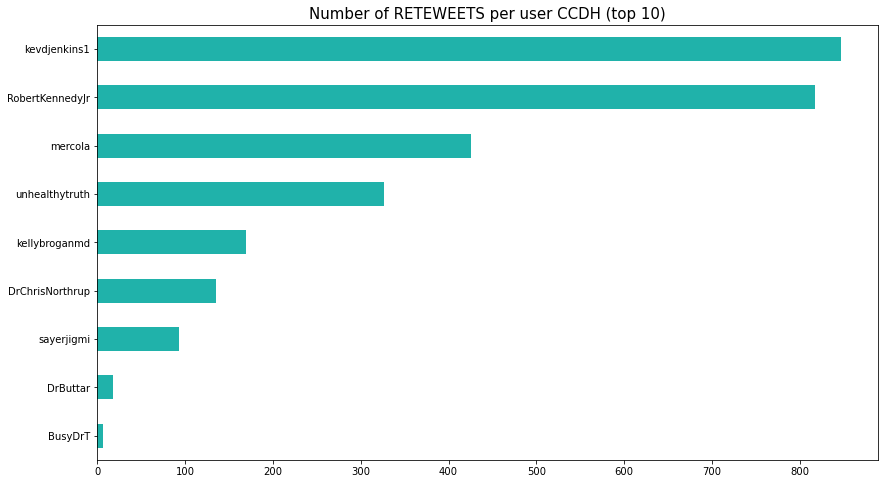

In [11]:
val = pd.Series(value_d)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user CCDH (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

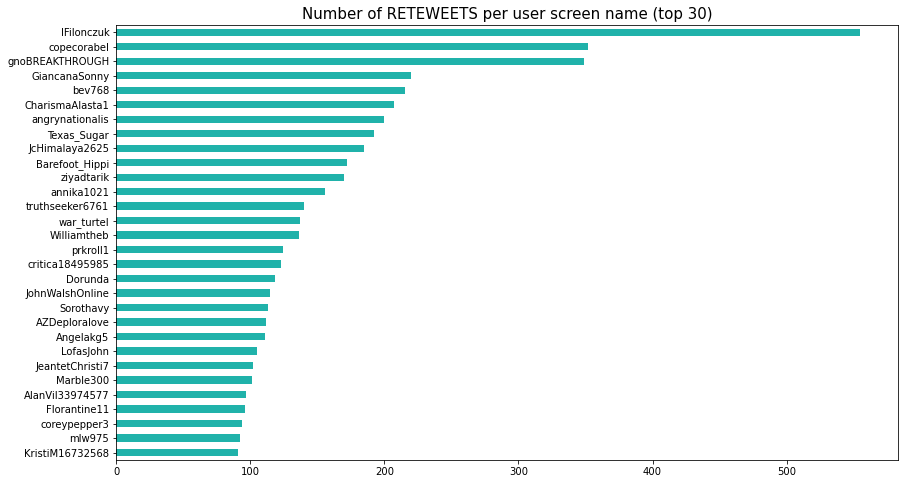

In [69]:
val = pd.Series(value_u)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

In [72]:
value = val.index
df_rt_ccdh = pd.DataFrame({'user_screen_name':value, 'rt_number':val})
df_rt_ccdh.to_csv(path[0] + "retweet_users_ccdh.csv", index=False)

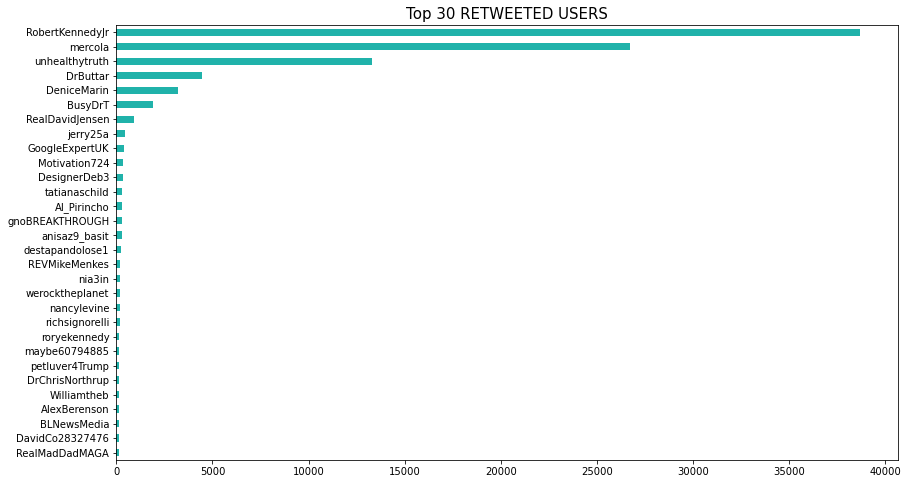

In [14]:
rt_names = val
val = pd.Series(retweet["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

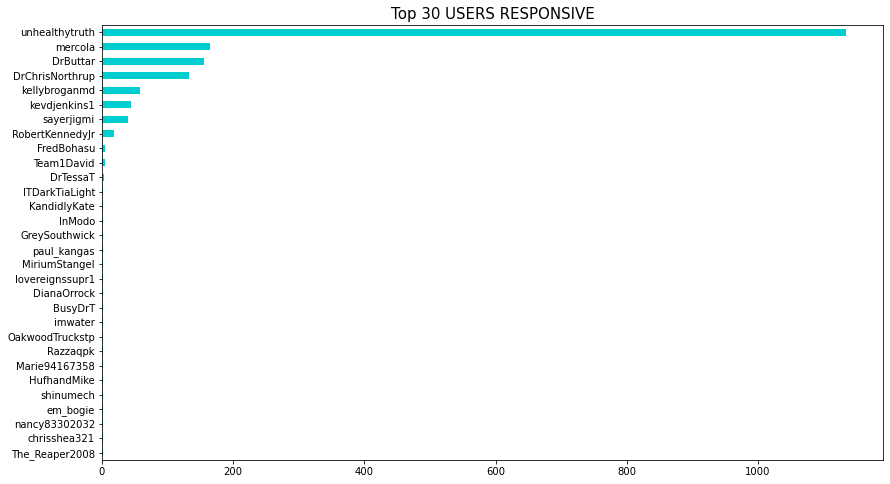

In [15]:
val = pd.Series(reply["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

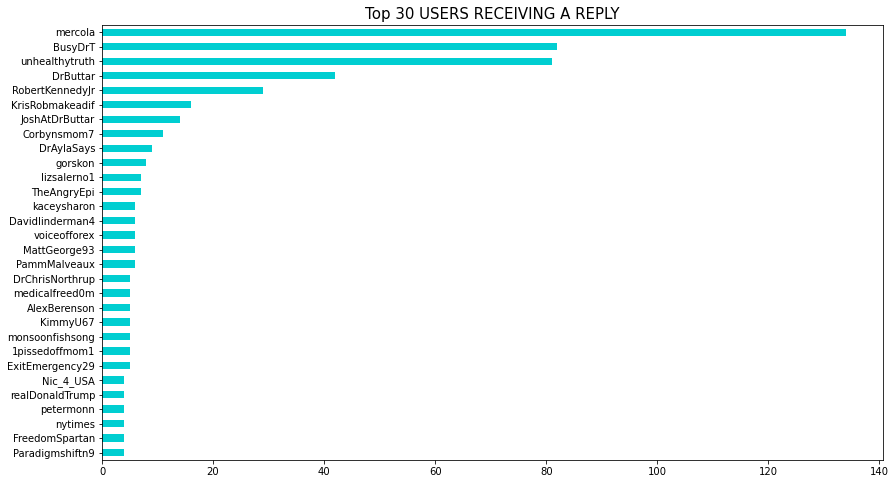

In [16]:
val = pd.Series(reply["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

## Verified Top Users
<a id="top_v"/>

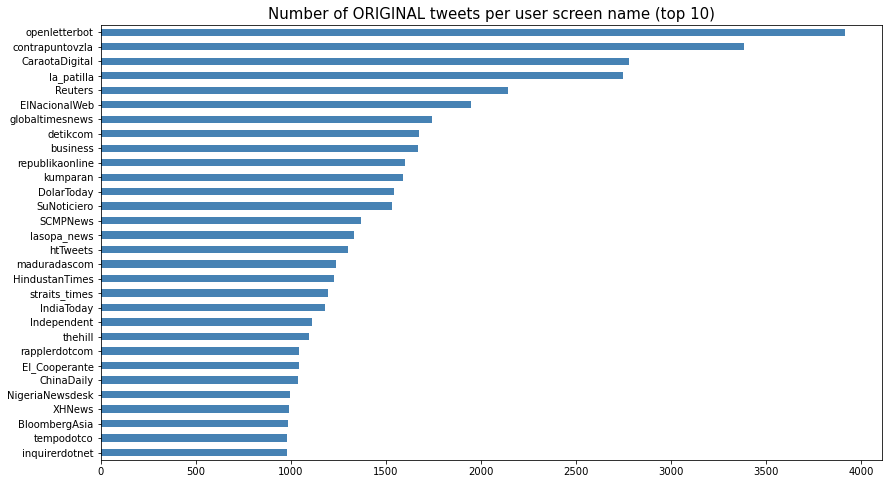

In [118]:
val = pd.Series(original_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

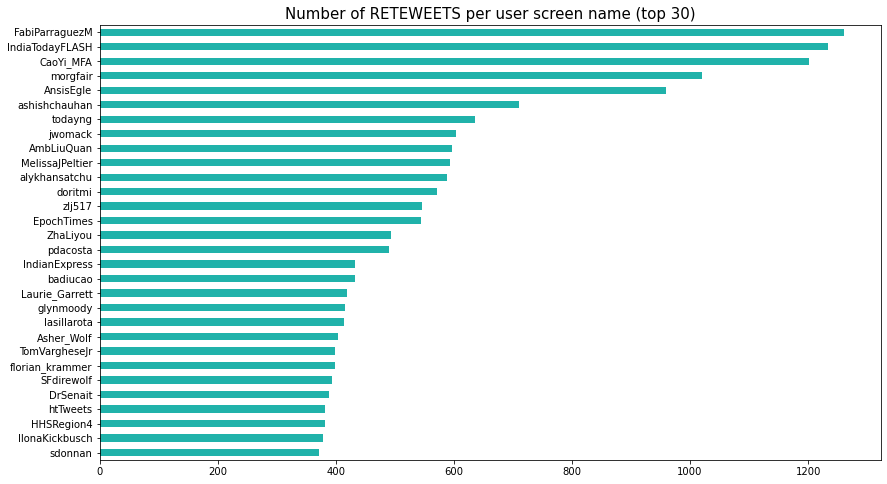

In [119]:
val = pd.Series(retweet_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

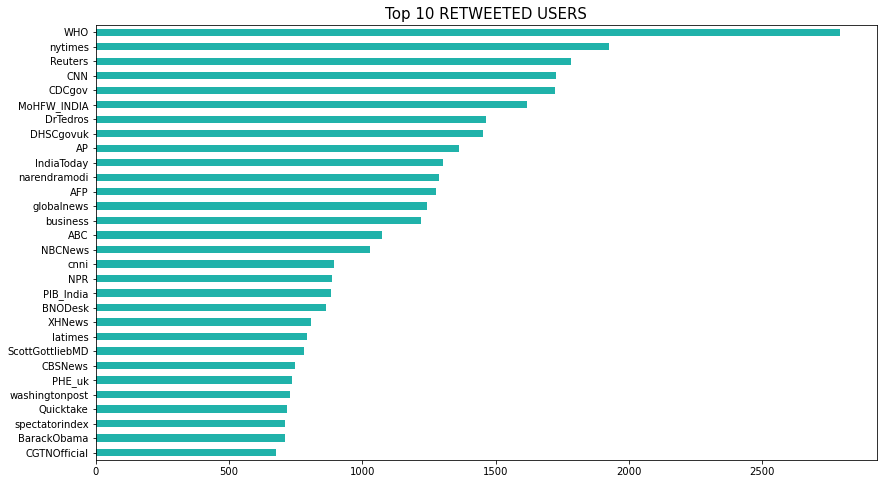

In [120]:
val = pd.Series(retweet_v["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

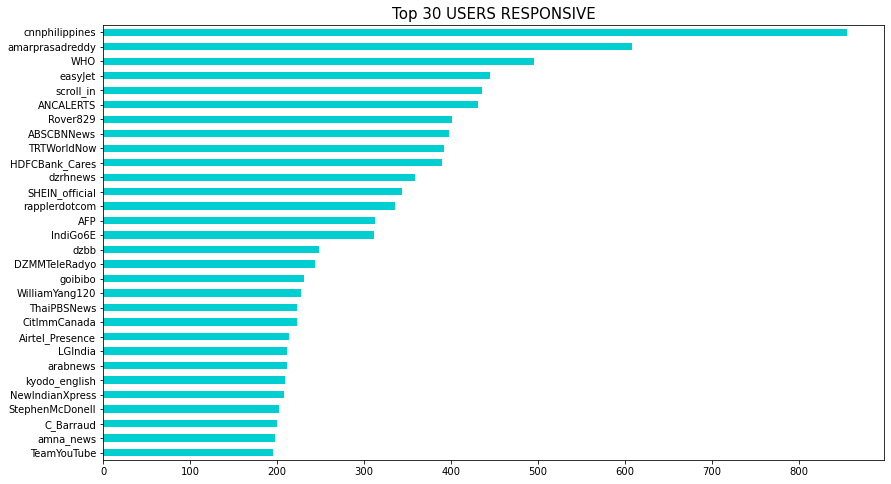

In [121]:
val = pd.Series(reply_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

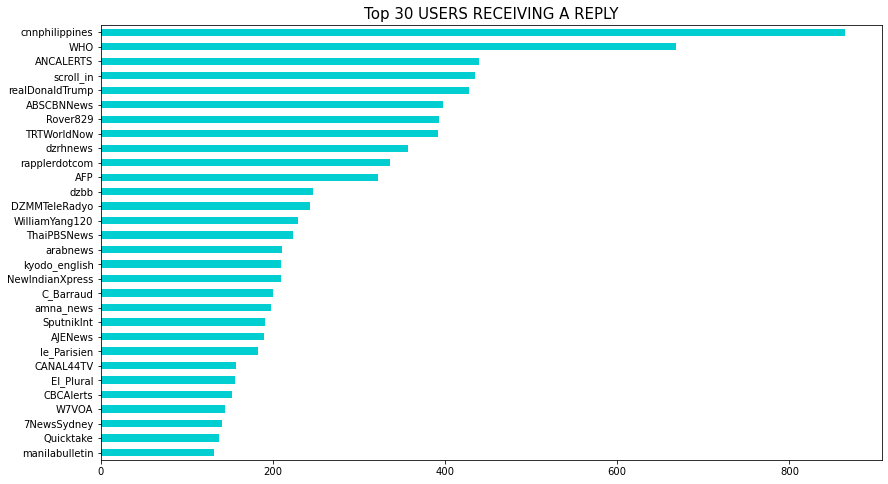

In [123]:
val = pd.Series(reply_v["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

### Hashtags CCDH
<a id="hastag_ccdh" />

In [17]:
tweets_with_hashtags = df.loc[df['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df),2)}% of total tweets')

Number of tweets with hashtags: 6149, 4.75% of total tweets


In [18]:
importlib.reload(tweets_utils)
hashtag = []
for i in df["hashtags"]:
    if(i != "[]"):
        x = i.split(" ")
        length = (len(x)) // 5
        index = 0
        for j in range(length):
            index = index + 1
            val = x[index].replace("'", "")
            x_replace = val.replace(",", "")
            hashtag.append(x_replace)
            index = index + 4

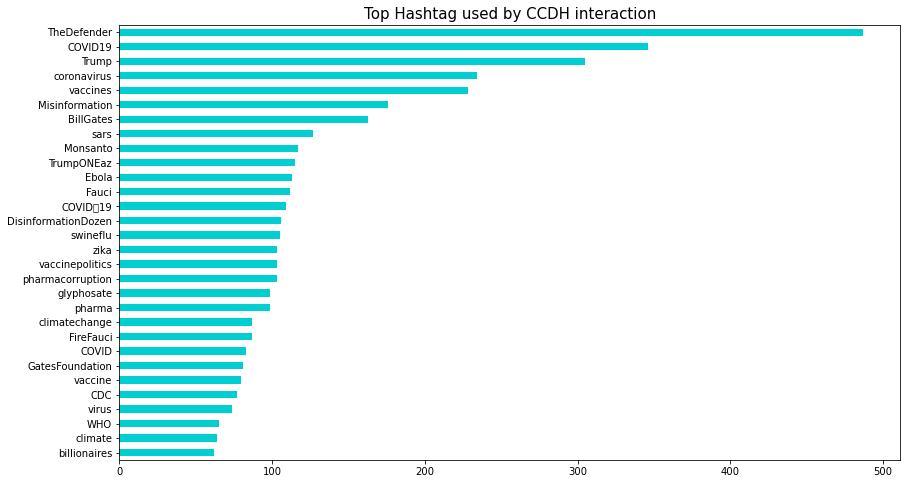

In [19]:
val = pd.Series(hashtag)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by CCDH interaction', fontsize=15)
ax.invert_yaxis()
plt.show()

In [38]:
ccdh_hashtags = val[:13]
ccdh_hashtags = list(ccdh_hashtags.index)
ccdh_hashtags.remove("coronavirus")
ccdh_hashtags.remove("vaccines")
ccdh_hashtags.remove("COVID19")
ccdh_hashtags.remove("COVIDー19")

In [41]:
df_hashtags = pd.DataFrame({'hashtag': ccdh_hashtags})
df_hashtags.to_csv(path_disinform[0] + "hashtags_sus.csv", index=False,line_terminator='\n', encoding='utf-8')

### Hashtags Verified
<a id="hastag_verified" />

In [172]:
tweets_with_hashtags = df_v.loc[df_v['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df_v),2)}% of total tweets')

Number of tweets with hashtags: 665989, 39.47% of total tweets


In [223]:
importlib.reload(tweets_utils)
hashtag_v = []
for i in df_v["hashtags"]:
    if(i != "[]" ) and (not type(i) == float):
        x = i.split(" ")
        length = (len(x)) // 5
        index = 0
        for j in range(length):
            index = index + 1
            val = x[index].replace("'", "")
            x_replace = val.replace(",", "")
            hashtag_v.append(x_replace)
            index = index + 4

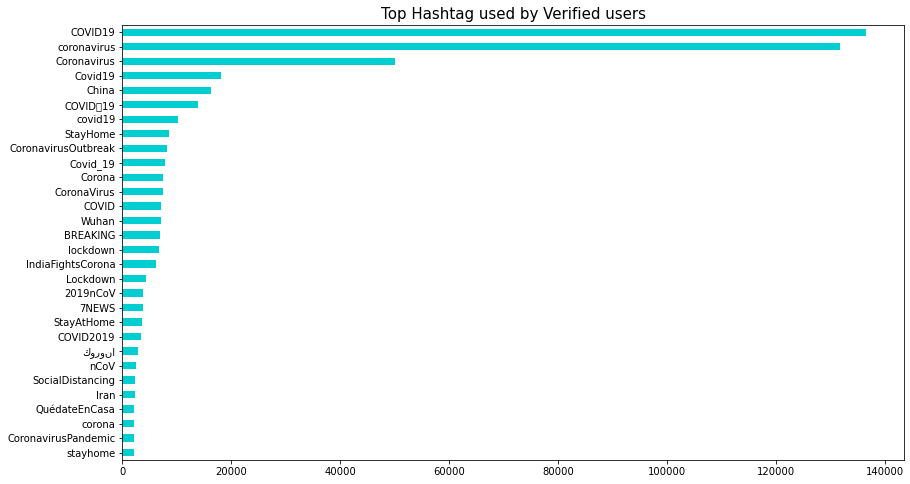

In [228]:
val = pd.Series(hashtag_v)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by Verified users', fontsize=15)
ax.invert_yaxis()
plt.show()

### Urls CCDH
<a id="ccdh_urls"/>

In [107]:
path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
credibility_url = pd.read_csv(path[0] + "domain_credibility.csv")
credibility_url

Domain Class
0               100percentfedup.com   low
1               100percentfedup.com  high
2                        10news.one   low
3                     12minutos.com   low
4                        12news.com  high
..                              ...   ...
820      childrenshealthdefense.org   low
821  AdvancedMedicineConference.com   low
822                         aol.com  high
823            trendingpolitics.com   low
824        charityauctionstoday.com   low

[825 rows x 2 columns]

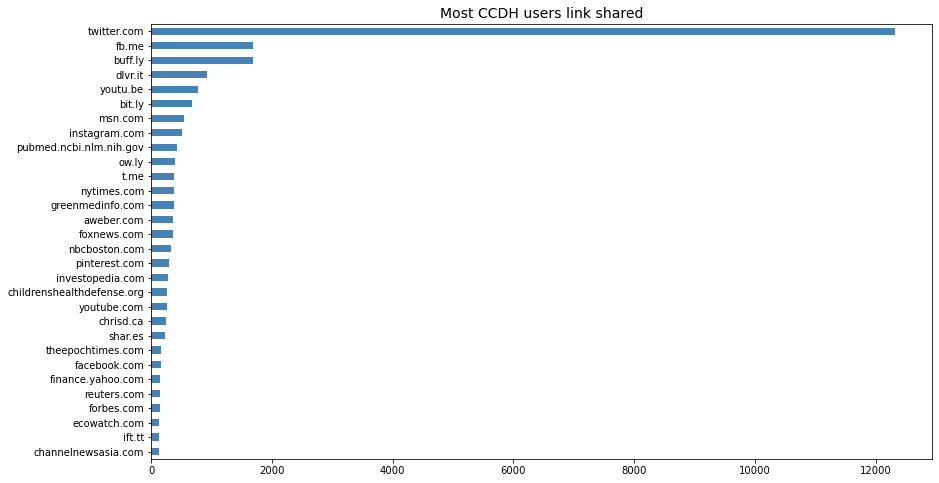

In [99]:
ccdh_urls = df["urls"]
ccdh_urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in ccdh_urls]
ccdh_urls = list(filter(lambda num: num != "0", ccdh_urls))
ccdh_urls = tweets_utils.remove_www(ccdh_urls)
val = pd.Series(ccdh_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most CCDH users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [111]:
urls_series = pd.Series(ccdh_urls)
x = urls_series[urls_series.isin(list(credibility_url["Domain"]))]
x = x.unique()
x

In [112]:
new_list_c = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in list(x):
        new_list_c.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [115]:
value_c = []
for j in ccdh_urls:
    for i in range(len(new_list_c)):
        if j in new_list_c[i][0]:
            value_c.append(new_list_c[i][1])

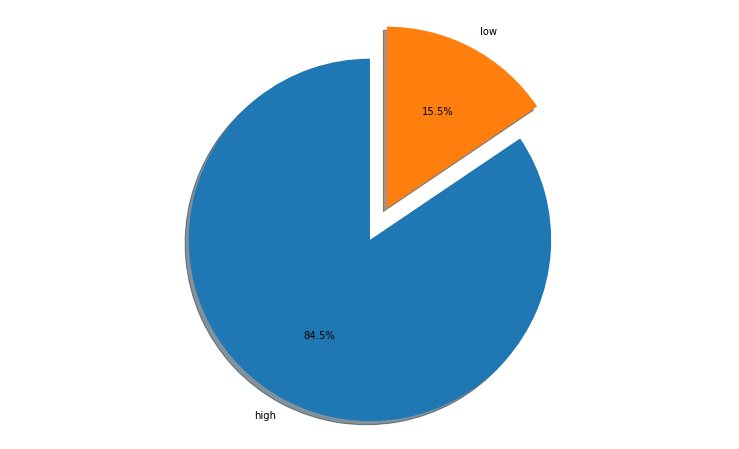

In [116]:
sizes = pd.Series(value_c).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [174]:
importlib.reload(tweets_utils)
ccdh_users = list(df["user_screen_name"].unique())
len(ccdh_users)

40002

In [178]:
start_time = time.perf_counter()
perc_list = []
count = 0
for i in ccdh_users:
    count = count + 1
    x = df[df["user_screen_name"]==i]
    urls = tweets_utils.format_urls(x["urls"])
    cred_list = []
    value = 0
    value_h = 0
    if(len(urls) > 0):
        for j in range(len(credibility_url["Domain"])):
            if credibility_url["Domain"][j] in urls:
                value = value + 1
                if(credibility_url["Class"][j] == "high"):
                    value_h = value_h + 1
        if(value > 0) and (value_h) > 0:
            perc_high = value_h / value
        elif (value_h) == 0 and (value == 0):
            perc_high = -1
        elif (value_h == 0) and (value > 0):
            perc_high = 0
        perc_list.append((i, perc_high))
    if(count % 1000 == 0):
        print(count)
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
Time:  754.4543384000026


In [180]:
a = []
b = []
for i in perc_list:
    a.append(i[0])
    b.append(i[1])


In [182]:
df_perc = pd.DataFrame(list(zip(a, b)),
               columns =['user_screen_name', 'perc'])
df_perc.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/percentage_ccdh.csv", index=False)

### Urls Verified
<a id="ccdh_verified"/>

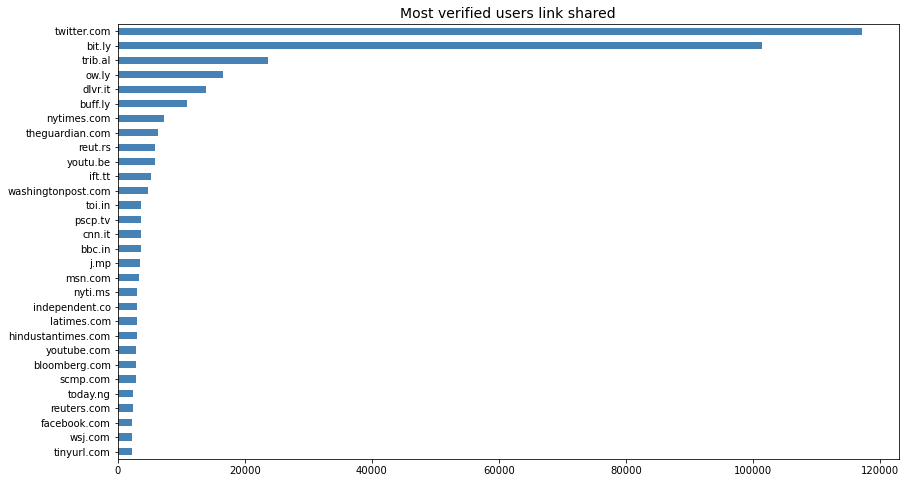

In [80]:
verified_urls = df_v["urls"]
ver = []
for v in verified_urls:
    if (v != "[]" ) and (not type(v) == float):
        ver.append(tweets_utils.url_decompress(v))
verified_urls = list(filter(lambda num: num != "0", ver))
verified_urls = tweets_utils.remove_www(verified_urls)
val = pd.Series(verified_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most verified users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [81]:
new_list = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in verified_urls:
        new_list.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [84]:
value = []
for j in verified_urls:
    for i in range(len(new_list)):
        if j in new_list[i][0]:
            value.append(new_list[i][1])

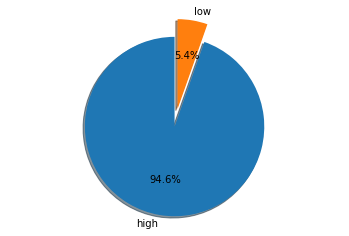

In [85]:
sizes = pd.Series(value).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### CCDH bot score distribution
<a id="ccdh_bot"/>


In [74]:
path_bot = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/")
bot = pd.read_csv(path_bot[0] + "csv/bot_score.csv")
score = pd.read_csv(path_bot[0] + "large_files/user_score.csv")
score.drop_duplicates(subset ="user", keep = False, inplace = True)
score = score.reset_index(drop=True)
bot.drop_duplicates(subset ="user", keep = False, inplace = True)
bot = bot.reset_index(drop=True)

In [75]:
df_rt_score = score[score["user"].isin(value_u)]

[0.4197222421546159, 0.6414184221423734, 0.7892294694438972, 0.8054784364249085, 0.8524047631581662]
Valore medio: 0.7060063048205133


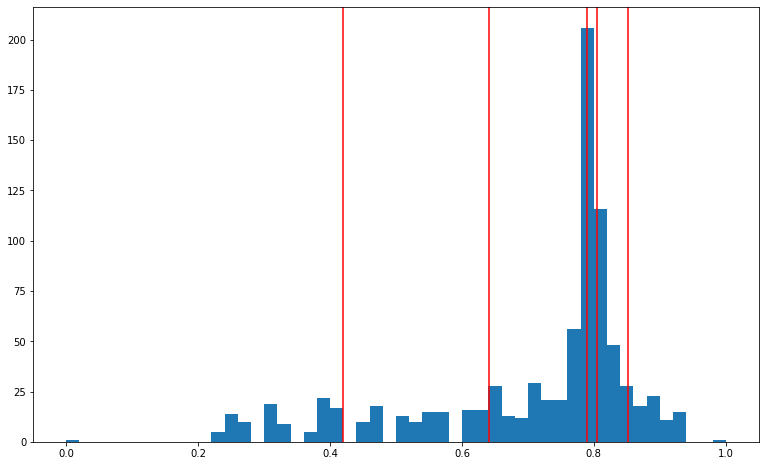

In [122]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)
print(f"Valore medio: {np.mean(df_rt_score.score)}")
plt.hist(df_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [77]:
bot_rt_ccdh = bot[bot["user"].isin(value_u)]

In [78]:
bot_rt_ccdh

id             user
160   1257997887386116096      deesbarbara
226    797547199928422401         KellyRek
350              34093672   proudCanadavet
1006             51532506         agabus98
1128             20157199          4annegs
...                   ...              ...
2886             21603495       sigstarget
2894            466958869   KathyHoldshope
2898            174771928        tomasacat
2939             47880403  davidstevens111
2963  1101154043035115533         debr3322

[72 rows x 2 columns]

### Verified bot score distribution
<a id="verified_bot"/>

In [79]:
df_v_rt_score = score[score["user"].isin(retweet_v["user_screen_name"])]
df_v_rt_score

user     score
43         lasopa_news  0.891232
57          DolarToday  0.859506
72     redaccionmedica  0.891232
74         Independent  0.796599
76       TOICitiesNews  0.891232
...                ...       ...
26784        CNNnews18  0.796622
26933      FarrahFazal  0.761188
26937        joshspero  0.278726
27258         Jeeveshu  0.502712
27290      MartinSoong  0.787400

[2935 rows x 2 columns]

[0.3342309004634953, 0.6004883262510591, 0.7874002196908744, 0.7970609972920484, 0.8100783815308749]
Valore medio: 0.6796509295188975


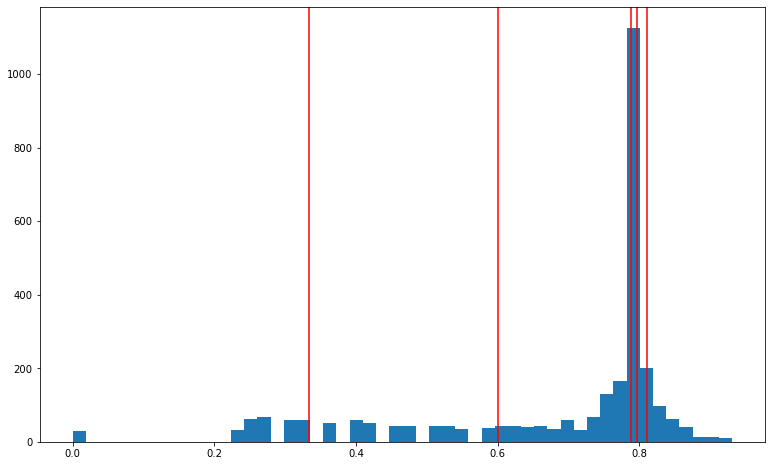

In [123]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_v_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)
print(f"Valore medio: {np.mean(df_v_rt_score.score)}")
plt.hist(df_v_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [81]:
df_v_bot = bot[bot["user"].isin(retweet_v["user_screen_name"])]
df_v_bot

id             user
21              301831339      lasopa_news
34    1016548032958091265  redaccionmedica
35               30846824    TOICitiesNews
64               18129942       tempodotco
65                1917731          thehill
...                   ...              ...
2428            954470334    pmnewsnigeria
2429             15098879       LaNacionPy
2441           1494927698         Medscape
2450           2292116678      AMXNoticias
2453             68596545       antaranews

[80 rows x 2 columns]

### Comparison between distributions
<a id="comp"/>

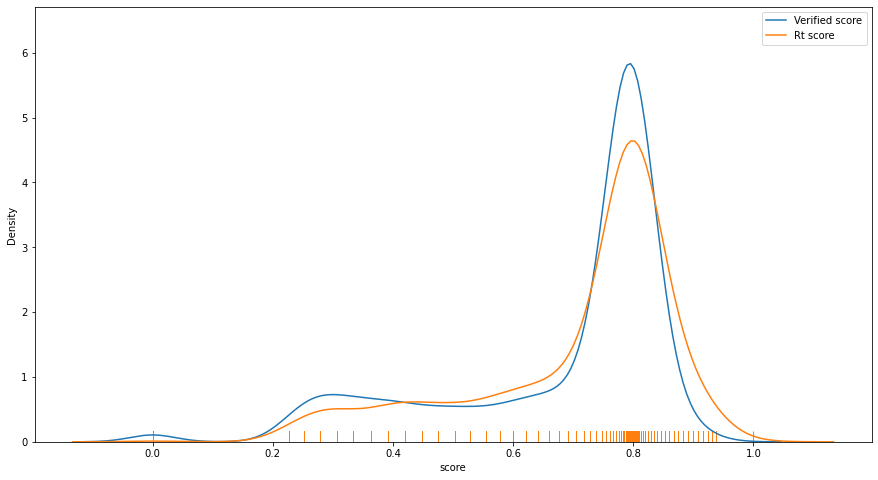

In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns


sns.distplot(df_v_rt_score["score"], hist=False, rug=True)
sns.distplot(df_rt_score["score"], hist=False, rug=True)
plt.legend(labels=["Verified score","Rt score"])
plt.rcParams["figure.figsize"] = (13,8)
plt.show()